## Bag of words

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [ ]:
corpus = [
     'The car is driven on the road',
     'The truck is driven on the highway',     
 ]

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)
print(X.toarray())

In [ ]:
vocab = vectorizer.vocabulary_
vocab

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(corpus) 
pd.DataFrame(tfidf.toarray())
#vectorizer.vocabulary_

## Log(IDF)

In [ ]:
vectorizer = TfidfVectorizer()
model = vectorizer.fit(corpus) 
dictionary = dict( zip( model.get_feature_names(), list(np.log(model.idf_))))
for sent in corpus:
    for word in sent.split(): 
        tf_idf = dictionary[word.lower()]*(sent.count(word)/len(sent.split()))
        print(word+" ----> " +str(tf_idf))

# Simple Classifier

In [ ]:
# Perform imports and load the dataset

df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

### Check for missing values:

In [ ]:
df.isnull().sum()

In [ ]:
df['label'].value_counts()

### Split the data into train & test sets:

In [ ]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

In [ ]:
X_train_counts

In [ ]:
X_train_counts.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

## Train a Classifier

## Model 1 - Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

In [ ]:
# Form a prediction set
predictions = clf.predict(X_train_tfidf)
predictions

## Build a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

## Test the classifier and display results

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

In [ ]:
predictions

## Model 2 Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier



# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('mnb', RandomForestClassifier(n_estimators=100)),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

## Test the classifier and display results

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test, predictions))

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

## Word Cloud

In [1]:
!pip install wordcloud

In [6]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Returns a string
dataset = open("data/modi.txt", "r").read()
dataset = dataset.lower()

In [10]:
maskArray = np.array(Image.open("data/modi.png"))
cloud = WordCloud(background_color = "black", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))

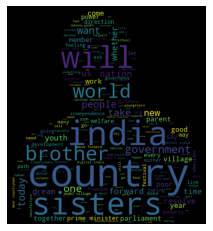

In [11]:
#cloud = WordCloud(background_color = "black", max_words = 100,  stopwords = set(STOPWORDS))
cloud.generate(dataset)
#cloud.to_file("wordCloud.png")
plt.axis("off")
plt.imshow(cloud)
#plt.show()